<a href="https://colab.research.google.com/github/HeadHunter483/HSE-MLDM-2020/blob/master/hw1/MLDM_2020_seminar01_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get the Titanic dataset:

In [1]:
!wget https://github.com/HSE-LAMBDA/MLDM-2020/raw/master/day-01/train.csv

--2020-09-14 14:19:06--  https://github.com/HSE-LAMBDA/MLDM-2020/raw/master/day-01/train.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2020/master/day-01/train.csv [following]
--2020-09-14 14:19:07--  https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2020/master/day-01/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.03s   

2020-09-14 14:19:07 (1.80 MB/s) - ‘train.csv’ saved [60302/60302]



In [2]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

## Task 1 (1 point)

In [3]:
# Compute survaval rate for each of the three passenger classes (`Pclass` = 1, 2 and 3)
# (can you do it using groupby?)

data.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

## Task 2 (1 point)

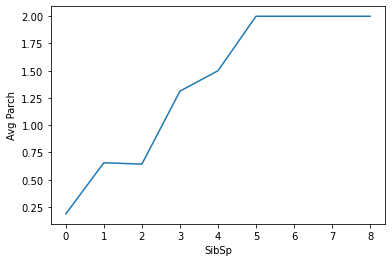

In [4]:
# Plot the average number of parents onboard (`Parch`) as a function of the 
# number of siblings onboard (`SibSp`)

import matplotlib.pyplot as plt

parents = data.groupby('SibSp')['Parch'].mean()
plt.plot(parents)
plt.xlabel('SibSp')
plt.ylabel('Avg Parch')
plt.show()

## Task 3 (2 points)

In [61]:
# Build a model with KNeighborsClassifier to get the accuracy of
# at least 0.75 on the validation part of the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def feature_selection_and_preprocessing(dataset):
  features = dataset[["Fare", "Parch", "Sex", "Pclass", "SibSp"]].copy()
  features["Sex"] = (features["Sex"] == "male").astype(int)
  features["Fare"] /= features["Fare"].mean()

  features['Fare'] *= 1
  return features

model = KNeighborsClassifier(
    n_neighbors=7
)


# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.85


## Task 4 (2 points)

Check how your model from the previous task performs on randomized splits to train / test (with test set of size 100). Plot the histogram of the test error distribution.

*Hint: check sklearn's `sklearn.model_selection.train_test_split` function.*

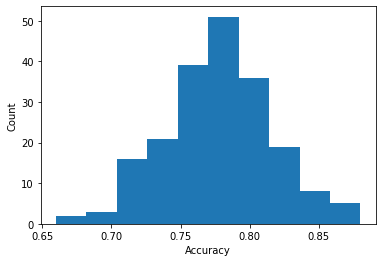

In [62]:
from sklearn.model_selection import train_test_split

SEED_MAX = 200

accuracies = []

for seed in range(SEED_MAX):
  data_train, data_test = train_test_split(
      data, test_size=100, random_state=seed, shuffle=True
  )
  model.fit(
      feature_selection_and_preprocessing(
          data_train.drop('Survived', axis=1)
      ),
      data_train['Survived']
  )

  test_predictions = model.predict(
      feature_selection_and_preprocessing(
          data_test.drop('Survived', axis=1)
      )
  )

  accuracies.append(accuracy_score(
    data_test['Survived'],
    test_predictions
  ))

plt.hist(accuracies)
plt.xlabel('Accuracy')
plt.ylabel('Count')
plt.show()